In [1]:
from keras.datasets import imdb
#num_words表示加载影评时，确保影评里面的单词使用频率保持在前1万位，于是有些很少见的生僻词在数据加载时会舍弃掉
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
#频率与单词的对应关系存储在哈希表word_index中,它的key对应的是单词，value对应的是单词的频率
word_index = imdb.get_word_index()
#我们要把表中的对应关系反转一下，变成key是频率，value是单词
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
'''
在train_data所包含的数值中，数值1，2，3对应的不是单词，而用来表示特殊含义，1表示“填充”，2表示”文本起始“，
3表示”未知“，因此当我们从train_data中读到的数值是1，2，3时，我们要忽略它，从4开始才对应单词，如果数值是4，
那么它表示频率出现最高的单词
'''
text = ""
for wordCount in train_data[0]:
    if wordCount > 3:
        text += reverse_word_index.get(wordCount - 3)
        text += " "
    else:
        text += "?"

print(text)

1646592/1641221 [==============================] - 1s 1us/step
?this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ?is an amazing actor and now the same being director ?father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ?and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ?to the two little boy's that played the ?of norman and paul they were just brilliant children are often left out of the ?list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and

In [5]:
import numpy as np
def oneHotVectorizeText(allText, dimension=10000):
    '''
    allText是所有文本集合，每条文本对应一个含有10000个元素的一维向量，假设文本总共有X条，那么
    该函数会产生X条维度为一万的向量，于是形成一个含有X行10000列的二维矩阵
    '''
    oneHotMatrix = np.zeros((len(allText), dimension))
    for i, wordFrequence in enumerate(allText):
        oneHotMatrix[i, wordFrequence] = 1.0
    return oneHotMatrix

x_train = oneHotVectorizeText(train_data)
x_test =  oneHotVectorizeText(test_data)

print(x_train[0])

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

[0. 1. 1. ... 0. 0. 0.]


In [6]:
from keras import models
from keras import layers

model = models.Sequential()
#构建第一层和第二层网络，第一层有10000个节点，第二层有16个节点
#Dense的意思是，第一层每个节点都与第二层的所有节点相连接
#relu 对应的函数是relu(x) = max(0, x)
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#第三层有16个神经元，第二层每个节点与第三层每个节点都相互连接
model.add(layers.Dense(16, activation='relu'))
#第四层只有一个节点，输出一个0-1之间的概率值
model.add(layers.Dense(1, activation='sigmoid'))

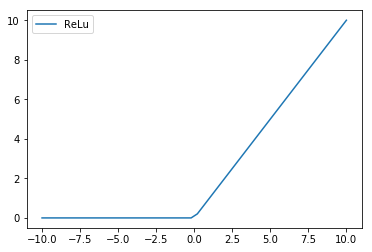

In [8]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10)
y_relu = np.array([0*item if item < 0 else item for item in x])
plt.figure()
plt.plot(x, y_relu, label='ReLu')
plt.legend()

In [9]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[: 10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, 
                    validation_data = (x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.5084 - acc: 0.7809 - val_loss: 0.3798 - val_acc: 0.8681
Epoch 2/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.3005 - acc: 0.9043 - val_loss: 0.3003 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3084 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1750 - acc: 0.9439 - val_loss: 0.2841 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1426 - acc: 0.9543 - val_loss: 0.2848 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.1149 - acc: 0.9653 - val_loss: 0.3151 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.0979 - acc: 0.9707 - val_loss: 0.3127 - val_ac

In [12]:
train_result = history.history
print(train_result.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


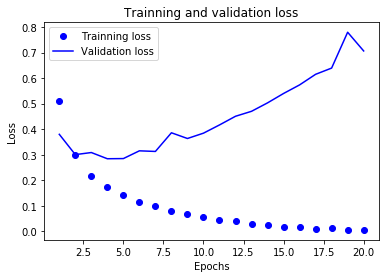

In [15]:
import matplotlib.pyplot as plt

acc = train_result['acc']
val_acc = train_result['val_acc']
loss = train_result['loss']
val_loss = train_result['val_loss']

epochs = range(1, len(acc) + 1)
#绘制训练数据识别准确度曲线
plt.plot(epochs, loss, 'bo', label='Trainning loss')
#绘制校验数据识别的准确度曲线
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 4s 171us/step - loss: 0.4584 - acc: 0.8133
Epoch 2/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2627 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2003 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 3s 129us/step
[0.31812242919921874, 0.87492]


In [27]:
model.predict(x_test)

array([[0.24373914],
       [0.99956506],
       [0.9632973 ],
       ...,
       [0.16960366],
       [0.12150484],
       [0.7645882 ]], dtype=float32)

In [1]:
import pandas as pd
df = pd.read_json('/Users/chenyi/Documents/人工智能出书/数据集/第6章/News_Category_Dataset.json', lines=True)
df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [2]:
categories = df.groupby('category')
print("total categories: ", categories.ngroups)
print(categories.size())

total categories:  31
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       3858
BUSINESS           4254
COLLEGE            1144
COMEDY             3971
CRIME              2893
EDUCATION          1004
ENTERTAINMENT     14257
FIFTY              1401
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
IMPACT             2602
LATINO VOICES      1129
MEDIA              2815
PARENTS            3955
POLITICS          32739
QUEER VOICES       4995
RELIGION           2556
SCIENCE            1381
SPORTS             4167
STYLE              2254
TASTE              2096
TECH               1231
THE WORLDPOST      3664
TRAVEL             2145
WEIRD NEWS         2670
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          2579
dtype: int64


In [3]:
df.category = df.category.map(lambda x:"WORLDPOST" if x == "THE WORLDPOST" else x)

In [4]:
categories = df.groupby('category')
print("total categories: ", categories.ngroups)
print(categories.size())

total categories:  30
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       3858
BUSINESS           4254
COLLEGE            1144
COMEDY             3971
CRIME              2893
EDUCATION          1004
ENTERTAINMENT     14257
FIFTY              1401
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
IMPACT             2602
LATINO VOICES      1129
MEDIA              2815
PARENTS            3955
POLITICS          32739
QUEER VOICES       4995
RELIGION           2556
SCIENCE            1381
SPORTS             4167
STYLE              2254
TASTE              2096
TECH               1231
TRAVEL             2145
WEIRD NEWS         2670
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          6243
dtype: int64


In [5]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence, one_hot
df['text'] = df.headline + " " + df.short_description

# 将单词进行标号
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.text)
X = tokenizer.texts_to_sequences(df.text)
df['words'] = X

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
#记录每条数据的单词数
df['word_length'] = df.words.apply(lambda i: len(i))
#清除单词数不足5个的数据条目
df = df[df.word_length >= 5]
df.word_length.describe()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    124068.000000
mean         26.128422
std          14.366390
min           5.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         248.000000
Name: word_length, dtype: float64

In [70]:
def word2Frequent(sequences):
    word_index = {}
    for sequence in sequences:
        for word in sequence:
            word_index[word] = word_index.get(word, 0) + 1
    return word_index
word_index = word2Frequent(df.words)


count = 10000
#将单词按照频率按照升序排序，然后取出排在第一万位的单词频率
s = [(k, word_index[k]) for k in sorted(word_index, key=word_index.get, reverse=True)]
print(s[0])
frequent_to_index = {}
for i in range(count):
    frequent_to_index[s[i][0]] = 9999 - i


145130
(1, 145130)
9999


In [30]:
# 将分类进行编号
categories = df.groupby('category').size().index.tolist()
category_int = {}
int_category = {}
for i, k in enumerate(categories):
    category_int.update({k:i})
    int_category.update({i:k})

df['c2id'] = df['category'].apply(lambda x: category_int[x])

In [74]:
import numpy as np
import keras.utils as utils
from sklearn.model_selection import train_test_split
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
        for word in sequences[i]:
            if frequent_to_index.get(word, None) is not None:
                pos = frequent_to_index[word]
                results[i, pos] = 1.0   
    return results

X = np.array(df.words)
X = vectorize_sequences(X)
print(X[0])
Y = utils.to_categorical(list(df.c2id))


# 将数据分成两部分,80%用于训练，20%用于测试

seed = 29
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)


find valid word
[0. 0. 0. ... 0. 0. 0.]


In [79]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
#当结果是输出多个分类的概率时，用softmax激活函数,它将为30个分类提供不同的可能性概率值
model.add(layers.Dense(len(int_category), activation='softmax'))

#对于输出多个分类结果，最好的损失函数是categorical_crossentropy
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=512)

Train on 99254 samples, validate on 24814 samples
Epoch 1/20
99254/99254 [==============================] - 20s 205us/step - loss: 2.2051 - acc: 0.4321 - val_loss: 1.7081 - val_acc: 0.5425
Epoch 2/20
99254/99254 [==============================] - 20s 198us/step - loss: 1.4639 - acc: 0.6034 - val_loss: 1.4853 - val_acc: 0.5907
Epoch 3/20
99254/99254 [==============================] - 20s 203us/step - loss: 1.2204 - acc: 0.6589 - val_loss: 1.4409 - val_acc: 0.6026
Epoch 4/20
99254/99254 [==============================] - 21s 212us/step - loss: 1.0793 - acc: 0.6930 - val_loss: 1.4336 - val_acc: 0.6045
Epoch 5/20
99254/99254 [==============================] - 21s 212us/step - loss: 0.9772 - acc: 0.7192 - val_loss: 1.4623 - val_acc: 0.6040
Epoch 6/20
99254/99254 [==============================] - 21s 215us/step - loss: 0.8933 - acc: 0.7422 - val_loss: 1.4973 - val_acc: 0.5994
Epoch 7/20
99254/99254 [==============================] - 21s 214us/step - loss: 0.8209 - acc: 0.7608 - val_loss: 1.

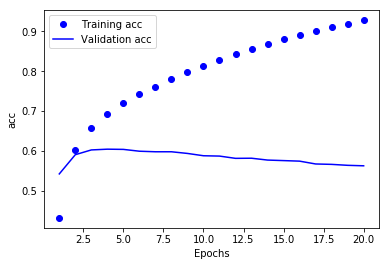

In [82]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


In [89]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
#当结果是输出多个分类的概率时，用softmax激活函数,它将为30个分类提供不同的可能性概率值
model.add(layers.Dense(len(int_category), activation='softmax'))

#对于输出多个分类结果，最好的损失函数是categorical_crossentropy
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=512)

Epoch 1/20
99254/99254 [==============================] - 19s 193us/step - loss: 2.7889 - acc: 0.2469
Epoch 2/20
99254/99254 [==============================] - 17s 172us/step - loss: 2.2250 - acc: 0.4021
Epoch 3/20
99254/99254 [==============================] - 17s 172us/step - loss: 2.0115 - acc: 0.4514
Epoch 4/20
99254/99254 [==============================] - 16s 163us/step - loss: 1.8884 - acc: 0.4881
Epoch 5/20
99254/99254 [==============================] - 16s 160us/step - loss: 1.8042 - acc: 0.5130
Epoch 6/20
99254/99254 [==============================] - 16s 165us/step - loss: 1.7427 - acc: 0.5292
Epoch 7/20
99254/99254 [==============================] - 17s 174us/step - loss: 1.6962 - acc: 0.5437
Epoch 8/20
99254/99254 [==============================] - 20s 200us/step - loss: 1.6581 - acc: 0.5526
Epoch 9/20
99254/99254 [==============================] - 21s 208us/step - loss: 1.6244 - acc: 0.5612
Epoch 10/20
99254/99254 [==============================] - 20s 203us/step - loss: 

In [86]:
results = model.evaluate(x_val, y_val)
print(results)

24814/24814 [==============================] - 4s 163us/step
[1.4682018341118412, 0.6000241798936403]


In [139]:
import pandas as pd
data_path = '/Users/chenyi/Documents/人工智能/housing.csv'
housing = pd.read_csv(data_path)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [93]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [94]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122352710>,
      dtype=object)

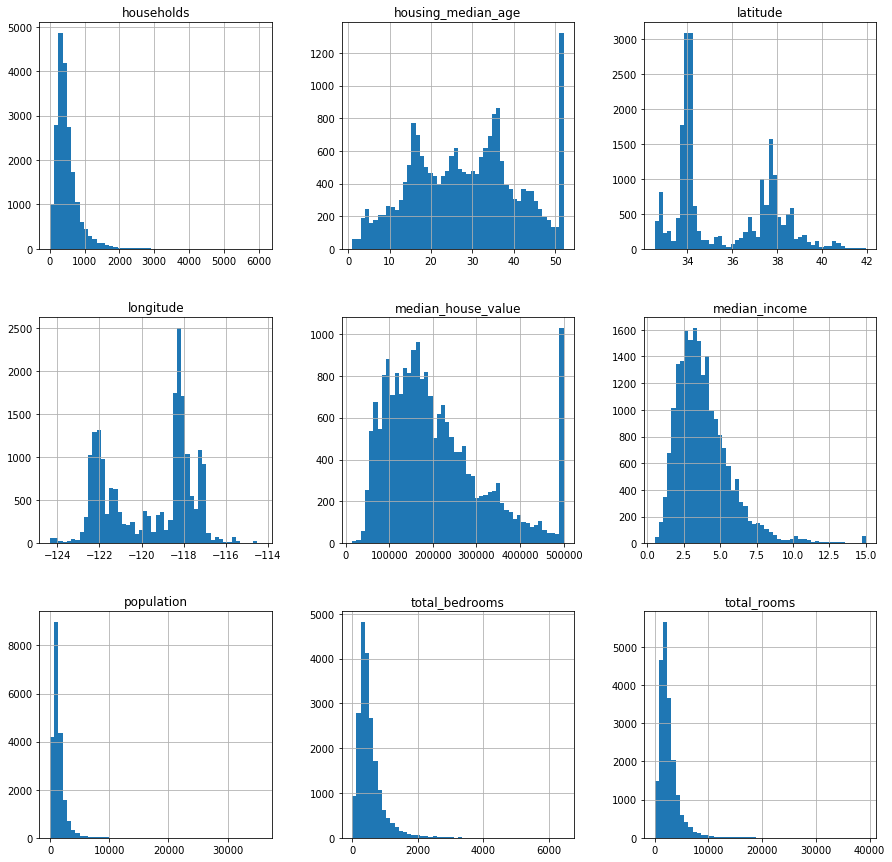

In [95]:
housing.hist(bins=50, figsize=(15,15))

In [96]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

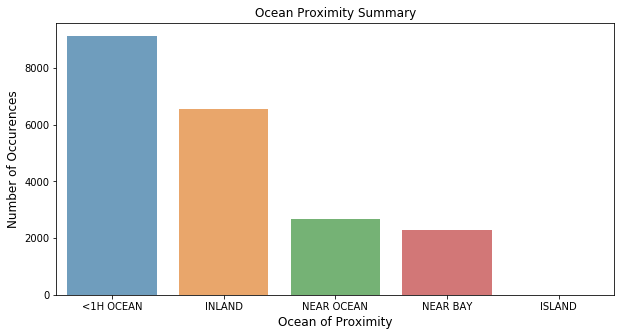

In [101]:
import seaborn as sns
total_count = housing['ocean_proximity'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(total_count.index, total_count.values, alpha=0.7)
plt.title("Ocean Proximity Summary")
plt.ylabel("Number of Occurences", fontsize=12)
plt.xlabel("Ocean of Proximity", fontsize=12)
plt.show()

In [102]:
print(housing.shape)

(20640, 10)


In [173]:
#将ocean_proximity转换为数值
housing['ocean_proximity'] = housing['ocean_proximity'].astype('category')
housing['ocean_proximity'] = housing['ocean_proximity'].cat.codes
#将median_house_value分离出来最为被预测数据
data = housing.values
train_data = data[:, [0,1,2,3,4,5,6,7,9]]
train_value = data[:,[8]]
print(train_data[0])
print(train_value[0])

[-122.23     37.88     41.      880.      129.      322.      126.
    8.3252    3.    ]
[452600.]


In [178]:
print(np.isnan(train_data).any())
print(np.argwhere(np.isnan(train_data)))
train_data[np.isnan(train_data)] = 0
print(np.isnan(train_data).any())

True
[[  290     4]
 [  341     4]
 [  538     4]
 [  563     4]
 [  696     4]
 [  738     4]
 [ 1097     4]
 [ 1350     4]
 [ 1456     4]
 [ 1493     4]
 [ 1606     4]
 [ 2028     4]
 [ 2115     4]
 [ 2301     4]
 [ 2323     4]
 [ 2334     4]
 [ 2351     4]
 [ 2412     4]
 [ 2420     4]
 [ 2578     4]
 [ 2608     4]
 [ 2647     4]
 [ 2826     4]
 [ 3024     4]
 [ 3328     4]
 [ 3354     4]
 [ 3376     4]
 [ 3482     4]
 [ 3485     4]
 [ 3529     4]
 [ 3721     4]
 [ 3778     4]
 [ 3912     4]
 [ 3921     4]
 [ 3958     4]
 [ 4043     4]
 [ 4046     4]
 [ 4186     4]
 [ 4279     4]
 [ 4309     4]
 [ 4391     4]
 [ 4447     4]
 [ 4496     4]
 [ 4591     4]
 [ 4600     4]
 [ 4629     4]
 [ 4667     4]
 [ 4691     4]
 [ 4738     4]
 [ 4743     4]
 [ 4744     4]
 [ 4767     4]
 [ 4852     4]
 [ 5059     4]
 [ 5216     4]
 [ 5222     4]
 [ 5236     4]
 [ 5654     4]
 [ 5665     4]
 [ 5678     4]
 [ 5723     4]
 [ 5751     4]
 [ 5990     4]
 [ 6052     4]
 [ 6068     4]
 [ 6220     4]
 [ 62

In [181]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

In [187]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [197]:
history = model.fit(train_data, train_value, epochs=300, 
                    validation_split=0.2, 
                    batch_size=32)

Train on 16512 samples, validate on 4128 samples
Epoch 1/300
16512/16512 [==============================] - 1s 50us/step - loss: 2530212518.4496 - mean_absolute_error: 33688.5586 - val_loss: 4339547598.2636 - val_mean_absolute_error: 46594.3603
Epoch 2/300
16512/16512 [==============================] - 1s 49us/step - loss: 2480255930.9147 - mean_absolute_error: 33426.6411 - val_loss: 4447675311.7519 - val_mean_absolute_error: 47034.3442
Epoch 3/300
16512/16512 [==============================] - 1s 55us/step - loss: 2460477046.2016 - mean_absolute_error: 33286.0955 - val_loss: 4345805326.1395 - val_mean_absolute_error: 46733.0906
Epoch 4/300
16512/16512 [==============================] - 1s 61us/step - loss: 2448185690.1705 - mean_absolute_error: 33177.7029 - val_loss: 4435659296.4961 - val_mean_absolute_error: 47169.8611
Epoch 5/300
16512/16512 [==============================] - 1s 66us/step - loss: 2427735584.8682 - mean_absolute_error: 32956.7021 - val_loss: 4437996560.8682 - val_mea

Epoch 84/300
16512/16512 [==============================] - 1s 67us/step - loss: 2246787663.1938 - mean_absolute_error: 31598.9288 - val_loss: 4597892995.5349 - val_mean_absolute_error: 48466.2585
Epoch 85/300
16512/16512 [==============================] - 1s 67us/step - loss: 2237753995.1628 - mean_absolute_error: 31577.5107 - val_loss: 4427645749.0853 - val_mean_absolute_error: 47446.9380
Epoch 86/300
16512/16512 [==============================] - 1s 66us/step - loss: 2231929715.5969 - mean_absolute_error: 31594.1983 - val_loss: 4457638596.5891 - val_mean_absolute_error: 47547.3480
Epoch 87/300
16512/16512 [==============================] - 1s 66us/step - loss: 2230987141.0853 - mean_absolute_error: 31580.6359 - val_loss: 4579250421.3333 - val_mean_absolute_error: 48331.1359
Epoch 88/300
16512/16512 [==============================] - 1s 65us/step - loss: 2230940000.6202 - mean_absolute_error: 31572.8778 - val_loss: 4354719533.5814 - val_mean_absolute_error: 46927.0001
Epoch 89/300
16

16512/16512 [==============================] - 1s 65us/step - loss: 2160813444.7132 - mean_absolute_error: 31095.3834 - val_loss: 4418329696.8682 - val_mean_absolute_error: 47601.2263
Epoch 167/300
16512/16512 [==============================] - 1s 65us/step - loss: 2159103185.9845 - mean_absolute_error: 31030.9337 - val_loss: 4316905345.8605 - val_mean_absolute_error: 46679.6680
Epoch 168/300
16512/16512 [==============================] - 1s 66us/step - loss: 2146117280.1860 - mean_absolute_error: 31003.7338 - val_loss: 4493804253.8915 - val_mean_absolute_error: 47591.6372
Epoch 169/300
16512/16512 [==============================] - 1s 65us/step - loss: 2158467454.6977 - mean_absolute_error: 31049.2964 - val_loss: 4385331312.9922 - val_mean_absolute_error: 47055.8683
Epoch 170/300
16512/16512 [==============================] - 1s 63us/step - loss: 2147855027.7829 - mean_absolute_error: 31026.4483 - val_loss: 4642095084.4031 - val_mean_absolute_error: 48526.3050
Epoch 171/300
16512/1651

16512/16512 [==============================] - 1s 82us/step - loss: 2089361428.8992 - mean_absolute_error: 30480.4436 - val_loss: 4216117833.4264 - val_mean_absolute_error: 45888.1768
Epoch 249/300
16512/16512 [==============================] - 1s 82us/step - loss: 2088575833.6744 - mean_absolute_error: 30457.5075 - val_loss: 4266313141.8915 - val_mean_absolute_error: 46245.4335
Epoch 250/300
16512/16512 [==============================] - 1s 86us/step - loss: 2085531538.1705 - mean_absolute_error: 30486.1486 - val_loss: 4273388357.0853 - val_mean_absolute_error: 46259.9790
Epoch 251/300
16512/16512 [==============================] - 1s 80us/step - loss: 2088251502.1395 - mean_absolute_error: 30423.6855 - val_loss: 4429598252.5271 - val_mean_absolute_error: 47152.2403
Epoch 252/300
16512/16512 [==============================] - 1s 80us/step - loss: 2087384615.1318 - mean_absolute_error: 30468.5213 - val_loss: 4385528880.7442 - val_mean_absolute_error: 46864.5565
Epoch 253/300
16512/1651

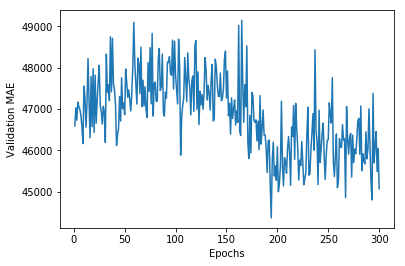

In [198]:
val_mae_history = history.history['val_mean_absolute_error']
plt.plot(range(1, len(val_mae_history) + 1), val_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

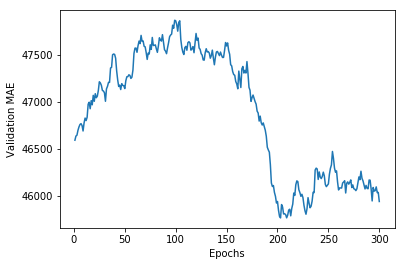

In [199]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(val_mae_history)

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
try:
    from PIL import Image
except ImportError:
    import Image

# Open image file
image = Image.open('doggy.jpeg')
my_dpi=300.

# Set up figure
fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
ax=fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

# Set the gridding interval: here we use the major tick interval
myInterval=100.
loc = plticker.MultipleLocator(base=myInterval)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

# Add the image
ax.imshow(image)

# Find number of gridsquares in x and y direction
nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

# Add some labels to the gridsquares
for j in range(ny):
    y=myInterval/2+j*myInterval
    for i in range(nx):
        x=myInterval/2.+float(i)*myInterval
        ax.text(x,y,'{:d}'.format(i+j*nx),color='w',ha='center',va='center')

# Save the figure
fig.savefig('doggy.tiff',dpi=my_dpi)